___
# Atividade: Uso da Distribuição Amostral da Média via resultado do TLC
___
## Aula 20

<div id="indice"></div>

## Índice

- [Teoria](#teoria)
- [Simulação](#simulacao)
    - [Exercício 1](#ex1)
    - [Visualizando os dados gerados](#visualizando)
    - [Exercício 2](#ex2)
    - [Exercício 3](#ex3)
    - [Exercício 4](#ex4)
    - [Exercício 5](#ex5)

___

In [36]:
%matplotlib inline
%reset -f
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

<div id="teoria"></div>

# Teoria

## Estatísticas e distribuições amostrais

Uma **estatística** é qualquer função baseada nas observações de uma amostra aleatória. Usamos estatísticas quando, para fins práticos, não é possível ter acesso a toda uma população.

A distribuição de probabilidades de uma estatística é chamada de *distribuição amostral*.


## Média Amostral $\overline{X}$

Assuma que $X$ seja uma variável aleatória com média $\mu$ e variância $\sigma^2$, ou seja, $E(X)=\mu$ e $Var(X)=\sigma^2$.

Sejam $X_1, X_2, \ldots, X_n$ amostras aleatórias de $X$ de tamanho $n$, então:

$$\overline{X} = \frac{X_1 + X_2 + X_3 + \cdots + X_n}{n}$$

É chamada *Média Amostral*!

Pode-se caracterizar a média amostral com os seguintes valores:

* Média de $\overline{X}$:

$$\mu_{\overline{X}} = E(\overline{X})=\frac{\mu + \mu + \cdots + \mu}{n} = \mu$$

* Variância de $\overline{X}$:


$$\sigma^2_{\overline{X}} = Var(\overline{X})=\frac{\sigma^2 + \sigma^2 + \cdots + \sigma^2}{n^2} = \frac{\sigma^2}{n}$$


<br>

## Teorema  Central do Limite (TLC)

Assuma que $X$ seja uma variável aleatória com média $\mu$ e variância $\sigma^2$, ou seja, $E(X)=\mu$ e $Var(X)=\sigma^2$.

Dado $X_i$ uma variável aleatória *i.i.d.* (independente e identicamente distribuída) a $X$ com distribuição qualquer, tem-se que:

$$\bar{X}=\frac{X_1+X_2+...+X_n}{n}=\frac{\sum_{i=1}^n X_i}{n} \sim N\left(\mu,\frac{\sigma^2}{n}\right),$$

quando $n$ for suficientemente grande.

*Obs:* Em alguns casos específicos, pode-se considerar $X_i$ com distribuições diferentes ou com certa dependência entre elas.

<br> 

**Resultado adicional:**

Se $X_1, X_2, \cdots, X_n$ é uma amostra aleatória de tamanho $n$ extraída de uma população com média $\mu$ e variância $\sigma^2$ e $\overline{X}$ é a distribuição da média amostral, a forma limite da distribuição:

$$Z = \frac{\overline{X} - \mu}{\sigma/\sqrt{n}} \sim N\left(0,1\right).$$

É a **distribuição normal padrão**, à medida que $n  \rightarrow \infty$.

___
<div id="simulacao"></div>

# Simulação

Vamos tentar entender a intuição do TLC através de uma simulação.

<div id="ex1"></div>

### EXERCÍCIO 1

Faça uma função chamada `amostra_uniforme(n)`, que recebe um número inteiro `n` e que retorna uma lista contendo `n` valores gerados aleatoriamente a partir de uma distribuição uniforme com parâmetros $a=10$, $b=20$. 

Esses `n` valores representam uma amostra aleatória qualquer extraída de $X\sim \text{Uniforme}(10;20)$.

**Dica:** você provavelmente vai utilizar o método `stats.uniform.rvs` (pesquise a documentação).

In [37]:
def amostra_uniforme(n):
    return stats.uniform.rvs(loc=10, scale=10, size=n)

___
<div id="visualizando"></div>

## Visualizando os dados gerados

Execute a função `amostra_uniforme(n)` criada no exercício anterior considerando `n=20`.

O gráfico a seguir contem um histograma com os valores da amostra gerados por sua função.

Execute algumas vezes a célula abaixo para perceber que a amostra pode conter valores diferentes.

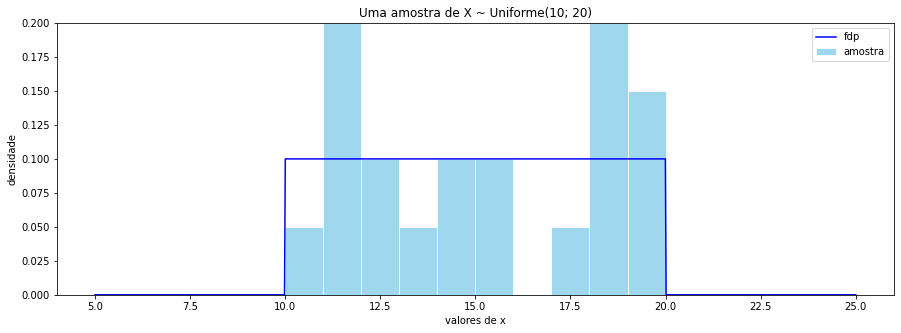

In [38]:
# Gera uma amostra aleatória de tamanho n
amostra = pd.Series(amostra_uniforme(20))

plt.figure(figsize=(15, 5))

# Para construir o histograma com amplitude 1 nas faixas
faixa = np.arange(10,21,1)
plt.hist(amostra_uniforme(20), bins=faixa, density=True,
         color='skyblue', edgecolor='white', 
         linewidth=1, alpha=0.8)

# Para construir a fdp 
eixo_x = np.linspace(5, 25, 1000)
fx_uniform = stats.uniform.pdf(eixo_x, loc=10, scale=20-10)
plt.plot(eixo_x, fx_uniform, color='blue')
plt.ylabel('densidade')
plt.xlabel('valores de x')
plt.title('Uma amostra de X ~ Uniforme(10; 20)')
plt.ylim(0,0.2)
plt.legend(('fdp','amostra'))

plt.show()


<div id="ex2"></div>

### EXERCÍCIO 2

Gere um amostra aleatória de tamanho `n=20` utilizando a sua função `amostra_uniforme`.
Calcule a média amostral.

In [39]:
amostra = amostra_uniforme(20)
print(f'A média amostral é: {sum(amostra) / len(amostra)} ')

A média amostral é: 14.768733052067052 


<div id="ex3"></div>

### EXERCÍCIO 3

**a.** Agora repita o [Exercício 2](#ex2) por mil vezes, armazenando as mil médias em uma lista.

**b.** Plote um histograma com as médias obtidas. Utilize `bins=20`, por exemplo.

**c.** Interprete a distribuição dessas médias amostrais.

(array([0.00483339, 0.        , 0.00483339, 0.06283404, 0.08216759,
        0.1160013 , 0.25133616, 0.33833714, 0.44950506, 0.60417346,
        0.63800718, 0.61384024, 0.45433844, 0.40117118, 0.3528373 ,
        0.22233583, 0.11116792, 0.05800065, 0.0386671 , 0.02900033]),
 array([12.76545354, 12.97234777, 13.17924199, 13.38613621, 13.59303044,
        13.79992466, 14.00681889, 14.21371311, 14.42060734, 14.62750156,
        14.83439579, 15.04129001, 15.24818424, 15.45507846, 15.66197269,
        15.86886691, 16.07576114, 16.28265536, 16.48954959, 16.69644381,
        16.90333803]),
 <BarContainer object of 20 artists>)

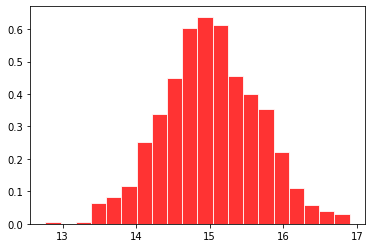

In [40]:
lista_medias = []
for i in range(0, 1000):
    lista_medias.append(amostra_uniforme(20).mean())

plt.hist(lista_medias, bins=20, density=True, color='red', edgecolor='white', linewidth=1, alpha=0.8)

<div id="ex4"></div>

### EXERCÍCIO 4

No [Exercício 1](#ex1), a sua função `amostra_uniforme(n)` foi constuída para gerar `n` valores para representar uma amostra aleatória qualquer. Ou seja, de forma teórica $X_1, X_2, X_3, \ldots, X_n$ é uma amostra aleatória de $X\sim \text{Uniforme}(10; 20)$.

No [Exercício 2](#ex2), calculamos uma única média amostral a partir dos valores $X_1, X_2, X_3, \ldots, X_n$. Nos nossos exemplos utilizamos `n=20`.

No [Exercício 3a](#ex3), geramos 1000 amostras de tamanho `n=20` e, com isso, foram calculadas 1000 médias amostrais, $\overline{X}$, todas obtidas de forma independente e da mesma distribuição. 

O que podemos observar no histograma é que essas 1000 médias amostrais se aproximam de uma distribuição simétrica. Seria uma distribuição normal?

Faça um *QQPlot* para avaliar, descritivamente, se as médias seguem uma distribuição normal.
Consulte [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html).

(0.6497939362413636, 15.015104730710435, 0.9994513857458325)

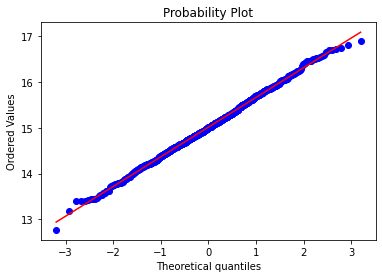

In [41]:
fx_teorica = stats.probplot(lista_medias, dist="norm", plot=plt)
fx_teorica[1]

<div id="ex5"></div>

### EXERCÍCIO 5

Pelo TLC, as médias amostrais $\overline{X}$ devem seguir distribuição normal conforme `n` seja grande. Há estudos que mostram que, com `n>30`, $\overline{X}$ já apresenta boa aproximação de uma normal não importando o formato de $X$.

Ainda, pelo TLC, $\overline{X}$ tem valor médio igual a $\mu$ (que é a média da distribuição original $X$, no caso da uniforme) e variância $\sigma^2/n$. Vamos verificar essa afirmação:

**a.** Calcule a média e variância teóricas da distribuição de $\overline{X}$. Para isso, calcule a média e a variância da $\text{Uniforme}(10; 20)$. Esses dois últimos valores vão representar $\mu$ e $\sigma^2$.

**b.** Calcule a média e variância das 1000 médias amostrais geradas no [Exercício 3](#ex3).

**c.** Compare os resultados e discuta se eles se aproximam do que era esperado pelo TLC.

In [46]:
# Média e variância da distribuição uniforme
media = stats.uniform.mean(loc=10, scale=10)
variancia = stats.uniform.var(loc=10, scale=10)

# Média e variância do exercício 3
media_amostral = sum(lista_medias) / len(lista_medias)
variancia_amostral = sum((lista_medias - media_amostral)**2) / len(lista_medias)


print(f'Média da distribuição uniforme: {media}')
print(f'Variância da distribuição uniforme: {variancia}')
print('--------------------')
print(f'Média da amostra: {media_amostral}')
print(f'Variância da amostra: {variancia_amostral}')

print('\nA variância amostral é menor que a variância da distribuição uniforme em n (n = 20) vezes')
print(f'Variância da distribuição uniforme / Variância da amostra = {variancia / variancia_amostral}')

Média da distribuição uniforme: 15.0
Variância da distribuição uniforme: 8.333333333333332
--------------------
Média da amostra: 15.015104730710426
Variância da amostra: 0.42034988523957384

A variância amostral é menor que a variância da distribuição uniforme em n (n = 20) vezes
Variância da distribuição uniforme / Variância da amostra = 19.824754629310387
